In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
import sys

In [ ]:
data = pd.read_csv('./Mall_Customers.csv')
data=pd.DataFrame(data)

In [ ]:
data[34:78]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
34,35,Female,49,33,14
35,36,Female,21,33,81
36,37,Female,42,34,17
37,38,Female,30,34,73
38,39,Female,36,37,26
39,40,Female,20,37,75
40,41,Female,65,38,35
41,42,Male,24,38,92
42,43,Male,48,39,36
43,44,Female,31,39,61


In [ ]:
data=data.drop(columns=['Gender'])
bar=data
copy=data

Applying Scaler and PAC to normalize our data to apply algorithm.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
  
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
data = pd.DataFrame(X_principal)
data.columns = ['P1', 'P2']
  
data.head()


,P1,P2
0,-0.616450,-0.688409
1,-0.505240,-0.831002
2,-0.604943,-0.427461
3,-0.545842,-0.807508
4,-0.808550,-0.504300


Applying k-means ALgorithm.

In [ ]:
'''Age and spending Score'''
X1 = data
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


In [ ]:
inertia

[159.30601324222272,
 86.2217721866943,
 41.62362392559551,
 25.051857159233393,
 17.82251059542758,
 12.067410250145638,
 10.050024265127114,
 8.668470605190478,
 7.464136566411021,
 6.202093468097921]

In [ ]:
algorithm_kmeans= (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm_kmeans.fit(X1)
labels1 = algorithm_kmeans.labels_
centroids1 = algorithm_kmeans.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1['P1'].min() - 1, X1['P1'].max() + 1
y_min, y_max = X1['P2'].min() - 1, X1['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
smallData = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['P1', 'P2'])
Z = algorithm.predict(smallData) 

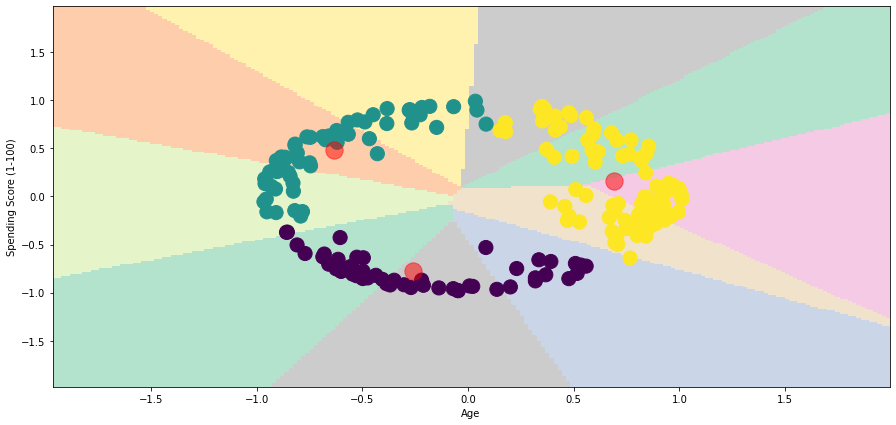

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'P1' ,y = 'P2' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

Applying Spectral clutering with rbf affinity.

In [ ]:
from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=3)
sc=sc.fit_predict(X1)



In [ ]:
sc

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
X1

,P1,P2
0,-0.616450,-0.688409
1,-0.505240,-0.831002
2,-0.604943,-0.427461
3,-0.545842,-0.807508
4,-0.808550,-0.504300
...,...,...
195,0.949111,0.135969
196,0.771409,0.588641
197,0.968015,0.119877
198,0.821200,0.374288


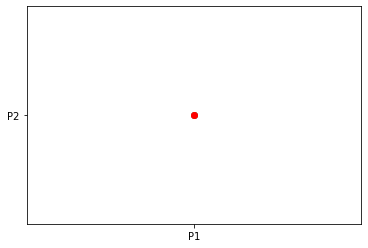

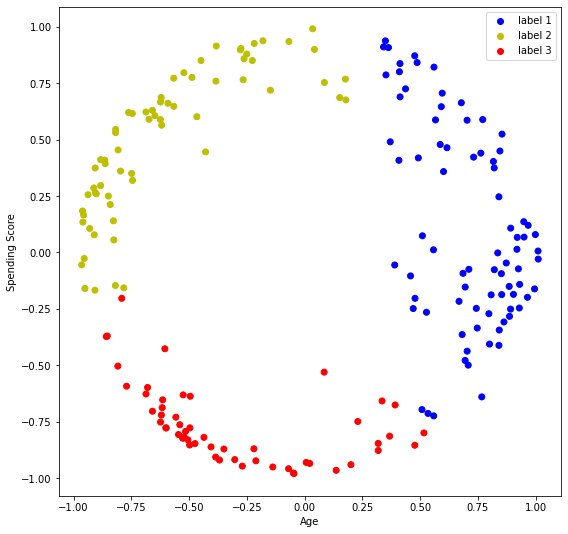

In [ ]:
colors={}
colors[0]='b'
colors[1]='y'
colors[2]='r'
cvec=[colors[i] for i in sc]
b=plt.scatter(x='P1',y='P2',color='b')
y=plt.scatter(x='P1',y='P2',color='y')
r=plt.scatter(x='P1',y='P2',color='r')

plt.figure(figsize =(9,9))
plt.scatter(x='P1',y='P2',data=X1,c=cvec)
plt.xlabel('Age'),plt.ylabel('Spending Score')
plt.legend((b,y,r),('label 1','label 2','label 3'))
plt.show()

Applying spectral clustering with nearesst-neighbour affinity.

In [ ]:
nearest=SpectralClustering(n_clusters=3,affinity='nearest_neighbors')
nearest_model=nearest.fit_predict(X1)

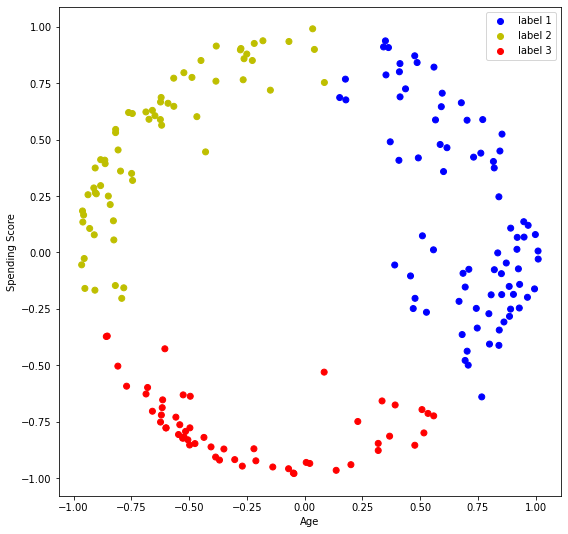

In [ ]:
colors={}
colors[0]='b'
colors[1]='y'
colors[2]='r'
cvec=[colors[i] for i in nearest_model]


plt.figure(figsize =(9,9))
plt.scatter(x='P1',y='P2',data=X1,c=cvec)
plt.xlabel('Age'),plt.ylabel('Spending Score')
plt.legend((b,y,r),('label 1','label 2','label 3'))
plt.show()

Comparing the three algorithms.

In [ ]:
affininty=['rbf','nearest-neighbours','kmeans']
s_scores=[]
s_scores.append(silhouette_score(bar,sc))
s_scores.append(silhouette_score(bar,nearest_model))
s_scores.append(silhouette_score(bar,labels1))

In [ ]:
print(s_scores)

[0.2864728854110913, 0.29270719573982384, 0.29270719573982384]


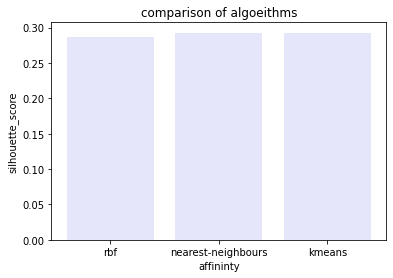

In [ ]:
plt.bar(affininty,s_scores,color='lavender')
plt.xlabel('affininty'),plt.ylabel('silhouette_score')
plt.title("comparison of algoeithms")
plt.show()

Since all the algorithms are in close proximity from each other and k-means and specteral clusterin with affinity towards nearest neighbour are identical, we preffred k means, when training an algorith with preset data base.

In [ ]:
labels1


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
labeled_data=copy
labeled_data['Group']=labels1

In [ ]:
labeled_data.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [ ]:
with open('data.csv','w') as f:
  f.write(labeled_data)
  

NameError: ignored

Implementing a new csv file which is generated on hourly basis, by an  automation code, in your app, (in this case we are manually putting itm through data obtained via google form, because of lack of resources to create an application.

updated_data.csv is file which can be written by file manipulation using python in your app, but we are downloading it, and putting it manually in.

It can also be programed via a simple automation scrip to download, csv records if they go over 50 in number and implemrnt in our model.


Below section of code can be used directly into an aaplication

In [ ]:
new_data=pd.read_csv('updated_data.csv')
new_data=pd.DataFrame(new_data)
algo=algorithm_kmeans
new_data.drop(columns=['Gender'],inplace=True)
base_count=len(copy['CustomerID'])
new_data['CustomerID']=[base_count+i-1 for i in new_data['CustomerID']]
new_data



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,200,19,17,81
1,201,17,11,31
2,202,21,20,43
3,203,20,27,79


In [ ]:
copy.drop(columns=['Group'],inplace=True)
copy

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


Applying vector and pca analysis on newly updated data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(reinforcement_data)
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
  
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
new_pca = pd.DataFrame(X_principal)
new_pca.columns = ['P1', 'P2']
  
new_pca.head()
reinforcement_data=new_pca


,P1,P2
0,-0.616450,-0.688409
1,-0.505240,-0.831002
2,-0.604943,-0.427461
3,-0.545842,-0.807508
4,-0.808550,-0.504300


In [ ]:
algo.fit(new_pca)
newlabels=algo.labels_
reinforcement_data.shape

(200, 4)

In [ ]:
reinforcement_data['predictions']=newlabels
reinforcement_data


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),predictions
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,2
197,198,32,126,74,2
198,199,32,137,18,2


In [ ]:
algorithm_kmeans.fit(reinforcement_data)